We have a supervised machine learning problem where we have list of tweets of airlines we will do a sentiment analysis using non linear models

In [1]:
pwd

'C:\\Users\\Deepu\\Documents\\machine_learning'

In [2]:
cd C:\\Users\\Deepu\\Downloads

C:\Users\Deepu\Downloads


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('tweets.csv')

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.shape

(14640, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

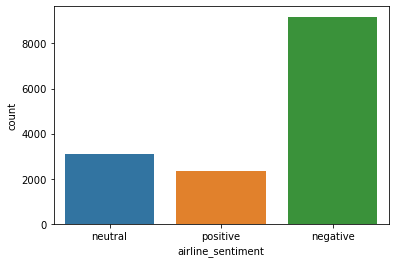

In [8]:
sns.countplot(df.airline_sentiment)

In [9]:
#let's see the distribution of the continous variable 
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [10]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
df['length'] = df['text'].apply(len)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


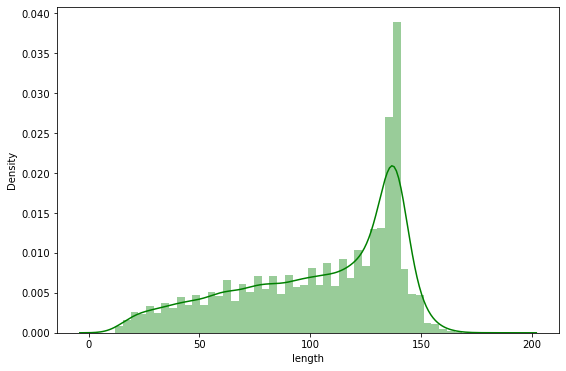

In [12]:
plt.figure(figsize = (9,6))
sns.distplot(df.length,bins = 50,color = "green")
plt.show()

**This means there are lots of tweet which have a length of 100 to 150 and a lot of data points are concentrated around that point**

In [13]:
df.length.describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: length, dtype: float64

In [14]:
df.length.max()

186

In [15]:
df[df['length'] == df.length.max()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,length
10405,569328854948573187,positive,0.6925,NaN,0.0,US Airways,NaN,zfelice,NaN,0,"@USAirways Eyyyy! Cancelled Flightlations, Fli...",NaN,2015-02-21 18:52:31 -0800,"This Ain't Chicago, Tennessee",Central Time (US & Canada),186


In [16]:
# Another way to find the tweet with max length 
for i in range(len(df.length)):
    if df.length[i] == 186:
        print(df.loc[i,['text']])


text    @USAirways Eyyyy! Cancelled Flightlations, Fli...
Name: 10405, dtype: object


In [17]:
# since we are concern with only two columns lets check if there is any null values 
df[['airline_sentiment','text']].isnull().sum().sum()

0

In [18]:
# Now we will remove the punctuation and stop words from the text


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import string
from nltk.corpus import stopwords

In [21]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
def text_process(x):
    pun_remove=[i for i in x if i not in string.punctuation]
    pun_remove = ''.join(pun_remove)
    return pun_remove

In [24]:
pun_remove=[i for i in df.text[0] if i not in string.punctuation]
pun_remove = ''.join(pun_remove)
print(pun_remove)
print(pun_remove.split())

VirginAmerica What dhepburn said
['VirginAmerica', 'What', 'dhepburn', 'said']


In [25]:
df.text.apply(lambda x: text_process(x))

0                         VirginAmerica What dhepburn said
1        VirginAmerica plus youve added commercials to ...
2        VirginAmerica I didnt today Must mean I need t...
3        VirginAmerica its really aggressive to blast o...
4        VirginAmerica and its a really big bad thing a...
                               ...                        
14635    AmericanAir thank you we got on a different fl...
14636    AmericanAir leaving over 20 minutes Late Fligh...
14637    AmericanAir Please bring American Airlines to ...
14638    AmericanAir you have my money you change my fl...
14639    AmericanAir we have 8 ppl so we need 2 know ho...
Name: text, Length: 14640, dtype: object

In [33]:
def text_process_mod(x):
    pun_remove=[char for char in x if char not in string.punctuation]
    pun_remove = ''.join(pun_remove)
    
    stop_removed=[word for word in pun_remove.split() if word.lower() not in stopwords.words('english')]
    stop_removed = ' '.join(stop_removed)
    return stop_removed

In [34]:
df['tokenized_tweet'] = df['text'].apply(text_process_mod)

In [35]:
df['tokenized_tweet']

0        VirginAmerica plus youve added commercials exp...
1        VirginAmerica really aggressive blast obnoxiou...
2                       VirginAmerica really big bad thing
3        VirginAmerica seriously would pay 30 flight se...
4        VirginAmerica yes nearly every time fly VX “ea...
                               ...                        
11536    AmericanAir flight Cancelled Flightled leaving...
11537                        AmericanAir right cue delays👌
11538       AmericanAir thank got different flight Chicago
11539    AmericanAir leaving 20 minutes Late Flight war...
11540    AmericanAir money change flight dont answer ph...
Name: tokenized_tweet, Length: 11541, dtype: object

In [36]:
text_process_mod(df.text[0])

'VirginAmerica plus youve added commercials experience tacky'

In [37]:
#we will be focousing on the positive and the negative class only 
df=df[df['airline_sentiment'] != 'neutral'].reset_index()

ValueError: cannot insert level_0, already exists

In [38]:
df.airline_sentiment.value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [39]:
# let's just focous on the tweet and sentiment 
tweet = df[['airline_sentiment','tokenized_tweet','length']]

In [40]:
tweet.head()

,airline_sentiment,tokenized_tweet,length
0,positive,VirginAmerica plus youve added commercials exp...,72
1,negative,VirginAmerica really aggressive blast obnoxiou...,126
2,negative,VirginAmerica really big bad thing,55
3,negative,VirginAmerica seriously would pay 30 flight se...,135
4,positive,VirginAmerica yes nearly every time fly VX “ea...,79


In [41]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   tokenized_tweet    11541 non-null  object
 2   length             11541 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


In [42]:
# Let's do train test split and then do the vectorization 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tweet['tokenized_tweet'],tweet['airline_sentiment'],test_size = 0.4, random_state = 30)

In [43]:
x_train.shape,y_train.shape

((6924,), (6924,))

In [44]:
x_test.shape,y_test.shape

((4617,), (4617,))

In [45]:
x_train.head()

10318    AmericanAir Also wait 2 hours speak someone ph...
881      united three people awesome working long hours...
3237     united thanks rude customer service 3 hour del...
7500     USAirways name Rett Cavan gofundme page going ...
7420     USAirways hire smarter people systems keep cra...
Name: tokenized_tweet, dtype: object

In [46]:
pd.set_option('display.max_colwidth', -1) # system command to see all the text

C:\Users\Deepu\AppData\Local\Temp\ipykernel_2976\1421825631.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # system command to see all the text


In [47]:
x_train.head()

10318    AmericanAir Also wait 2 hours speak someone phone cant wait 2 hours                                      
881      united three people awesome working long hours easy say sorry Twitter help ppl EWR                       
3237     united thanks rude customer service 3 hour delay really helped timing wise afternoon meetings Hello Delta
7500     USAirways name Rett Cavan gofundme page going take last breath tonight airline cares money               
7420     USAirways hire smarter people systems keep crashing instead mooks man airports goDelta                   
Name: tokenized_tweet, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [49]:
# transformation 
train_vectorizered = vectorizer.fit_transform(x_train)
test_vectorizered = vectorizer.transform(x_test)

In [50]:
# we will have a sparse matrix 
train_vectorizered.toarray(), test_vectorizered.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

# fitting an SVM model 

In [152]:
from sklearn import svm
clf = svm.SVC()

In [153]:
clf.fit(train_vectorizered,y_train)

SVC()

In [155]:
train_pred = clf.predict(train_vectorizered)

In [156]:
test_pred = clf.predict(test_vectorizered)

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
#train
confusion_matrix(y_train,train_pred)

array([[5481,   24],
       [ 170, 1249]], dtype=int64)

In [159]:
# test
confusion_matrix(y_test,test_pred)

array([[3604,   69],
       [ 369,  575]], dtype=int64)

In [161]:
from sklearn.metrics import roc_auc_score

In [165]:
from sklearn import datasets,metrics, model_selection,svm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


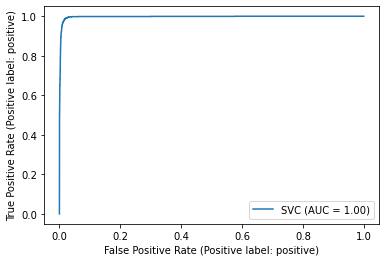

In [169]:
metrics.plot_roc_curve(clf,train_vectorizered,y_train)

### handling the huge class imblance evaluation with precision recall curve 
https://www.youtube.com/watch?v=EluMarMGezc

roc curve is between True positive rate and false positive rate it does not take the consideration of True negative and if we have a massively imbalanced data set then the roc curve does not paint a correct picture of the model performance so we use precession recall curve precesion is TP/TP+ FP and recall is TP/TP+FN 

Our model performation should be test on TN and FN which is recall of negative class over here the case is oppostise just keep that in mind the TP are less and True negative are more so adjust as per the data in hand , I have covered the explaination as per the youtube video

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


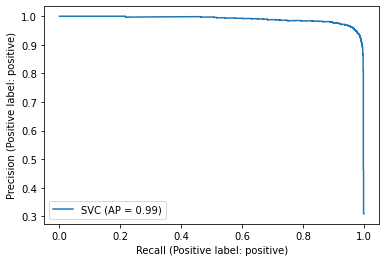

In [173]:
metrics.plot_precision_recall_curve(clf,train_vectorizered,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


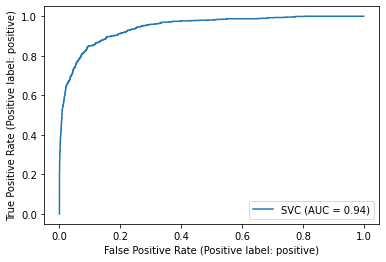

In [170]:
metrics.plot_roc_curve(clf,test_vectorizered,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


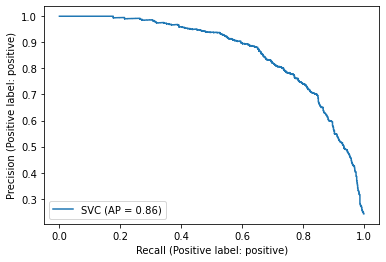

In [174]:
metrics.plot_precision_recall_curve(clf,test_vectorizered,y_test)

Here is a new way to look at the concept of precision let's say john is a criminal and the precision of your model is 89% this means there is 89% chance that your model will say that yes john is a criminal

# let's do a grid search on top on svm but first lets understand the main difference between the c value and the gamma hyperparameters 


## In Support Vector Machines (SVM), both the `C` parameter and the `gamma` parameter are critical hyperparameters, but they serve different purposes and have distinct effects on the SVM model. Let's explore the differences between these two parameters:

1. **C Parameter (Regularization Parameter):**
   - The `C` parameter is responsible for controlling the trade-off between maximizing the margin between classes and minimizing the classification error on the training data.
   - It is essentially a regularization parameter. A smaller `C` value encourages a wider margin but allows for more training points to be misclassified (soft margin), while a larger `C` value enforces a narrower margin and minimizes the training error (hard margin).
   - A smaller `C` value makes the SVM more tolerant of misclassified data points, leading to a smoother decision boundary and potentially increased bias (underfitting).
   - A larger `C` value makes the SVM less tolerant of misclassified points, leading to a more complex and flexible decision boundary, potentially at the risk of overfitting.

2. **Gamma Parameter (Kernel Parameter):**
   - The `gamma` parameter, on the other hand, is specific to SVMs using non-linear kernels (e.g., radial basis function or RBF kernel).
   - It controls the shape of the decision boundary by determining the influence of a single training example on the decision boundary.
   - A small `gamma` value implies that the influence of a data point is more widespread, resulting in a smoother, more generalized decision boundary.
   - A large `gamma` value implies that the influence is more localized, resulting in a more complex and localized decision boundary that can closely fit the training data.

In summary, the `C` parameter primarily regulates the balance between the margin and training error, while the `gamma` parameter impacts the complexity and flexibility of the decision boundary, particularly in non-linear SVMs using kernel functions. These parameters are crucial for tuning the SVM model to achieve the best trade-off between bias and variance for your specific classification problem. The optimal values for `C` and `gamma` depend on the characteristics of your dataset, and it often requires experimentation and hyperparameter tuning to find the most suitable values. 

In [178]:
param_dict = {
    'C' : [0.1,1,10,1000],
    'gamma': [1,0.1,0.01,0.0001],
    'kernel' : ['rbf','linear','poly']
}

In [176]:
# low c means soft margin means more misclassified classes and vice versa , there is a trade here which we have to deal with
# low gamma means a simple and more generalize boundary where as high gamma means a complex boundary 


In Support Vector Machines (SVMs), the choice of kernel is a fundamental hyperparameter that determines the type of decision boundary the SVM will create. The SVM uses different kernel functions to map the input data into a higher-dimensional feature space, where it can separate the data points. The three common kernel functions are:

1. **Radial Basis Function (RBF) Kernel:**
   - The RBF kernel, also known as the Gaussian kernel, is one of the most widely used kernels in SVMs.
   - It is suitable for both linear and non-linear classification problems.
   - The RBF kernel allows the SVM to capture complex, non-linear relationships in the data by transforming it into a higher-dimensional space.
   - The kernel's shape is determined by the `gamma` hyperparameter, which controls the width of the Gaussian curve used for mapping the data.

2. **Linear Kernel:**
   - The linear kernel is the simplest and most straightforward kernel.
   - It is appropriate for linearly separable data, where the decision boundary is a straight line.
   - When using the linear kernel, the SVM performs linear classification without any transformation of the data into a higher-dimensional space.
   - The linear kernel can be effective for tasks where the classes can be separated by a straight line, plane, or hyperplane.

3. **Polynomial (Poly) Kernel:**
   - The polynomial kernel is used to capture non-linear relationships in the data by transforming it into a higher-dimensional space using polynomial functions.
   - The degree of the polynomial is controlled by the `degree` hyperparameter. Higher degrees can capture more complex non-linear relationships but may lead to overfitting.
   - The polynomial kernel is suitable for data with complex curved decision boundaries.

In summary, the choice of kernel in SVMs depends on the nature of your data and the specific problem you are trying to solve. Here's a brief guideline for selecting a kernel:

- Use the **Linear Kernel** when your data is linearly separable, and you want a simple, interpretable model with a linear decision boundary.

- Use the **RBF Kernel** (Gaussian Kernel) by default or when you suspect that the data has non-linear patterns, as it is effective in capturing complex relationships.

- Use the **Polynomial Kernel** when you believe that a polynomial relationship is a good representation of the underlying data, but be cautious about overfitting, especially with higher polynomial degrees.

The choice of kernel should be part of your hyperparameter tuning process, along with other hyperparameters like `C` and `gamma` (if using an RBF kernel).

## difference between the rbf and polynomial kernel

the primary difference between the Radial Basis Function (RBF) kernel and the Polynomial (Poly) kernel in SVMs lies in the shape of the contours or decision boundaries they create when mapping the data into higher-dimensional feature spaces.

- **RBF Kernel:** The RBF kernel uses a Gaussian-like curve to transform the data. The shape of this curve is controlled by the `gamma` hyperparameter. A smaller `gamma` results in a wider curve, and a larger `gamma` results in a narrower curve. The decision boundary created by the RBF kernel can be more flexible and can capture complex, curved patterns in the data.

- **Polynomial Kernel:** The Polynomial kernel, on the other hand, transforms the data using polynomial functions. The degree of the polynomial is controlled by the `degree` hyperparameter. Higher degrees create more complex polynomial functions that can capture intricate non-linear patterns in the data. However, increasing the degree can also lead to a more complex and localized decision boundary, potentially resulting in overfitting.

In essence, the choice of kernel function affects the contours of the decision boundary in the feature space. The RBF kernel produces smoother, more flexible contours, while the Polynomial kernel generates contours based on polynomial functions of varying complexity. Your choice between these kernels should be based on the characteristics of your data and the problem you are trying to solve. Experimenting with different kernels and hyperparameters and evaluating their performance using techniques like cross-validation can help you determine the most suitable kernel for your specific application.

In short they differ by making the contour of the graph and hence the polynomial are a bit on the complex side 

In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
grid_tf = GridSearchCV(clf,param_dict,n_jobs = 2,cv = 5,verbose = 10, scoring = 'accuracy')

In [182]:
grid_tf.fit(train_vectorizered,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=10)

In [184]:
grid_tf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [185]:
train_pred_grid=grid_tf.predict(train_vectorizered)

In [186]:
test_pred_grid = grid_tf.predict(test_vectorizered)

In [188]:
# train
print(confusion_matrix(y_train,train_pred_grid))

[[5463   42]
 [ 125 1294]]


In [189]:
# test
print(confusion_matrix(y_test,test_pred_grid))

[[3557  116]
 [ 288  656]]


In [191]:
from sklearn.metrics import classification_report

In [192]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred_grid))
print("\n")
print(classification_report(y_test,test_pred_grid))

              precision    recall  f1-score   support

    negative       0.98      0.99      0.98      5505
    positive       0.97      0.91      0.94      1419

    accuracy                           0.98      6924
   macro avg       0.97      0.95      0.96      6924
weighted avg       0.98      0.98      0.98      6924



              precision    recall  f1-score   support

    negative       0.93      0.97      0.95      3673
    positive       0.85      0.69      0.76       944

    accuracy                           0.91      4617
   macro avg       0.89      0.83      0.86      4617
weighted avg       0.91      0.91      0.91      4617



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


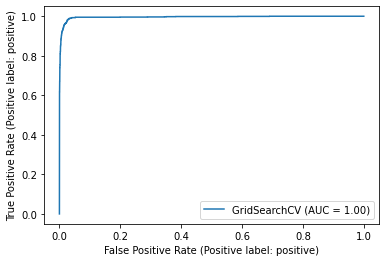

In [193]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(grid_tf, train_vectorizered, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


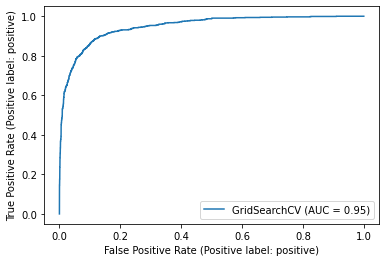

In [194]:
metrics.plot_roc_curve(grid_tf, test_vectorizered, y_test)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


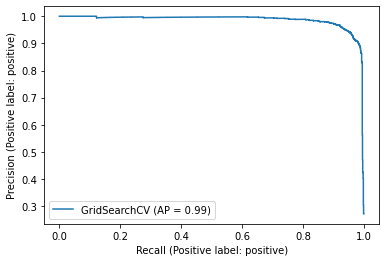

In [196]:
metrics.plot_precision_recall_curve(grid_tf, train_vectorizered, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


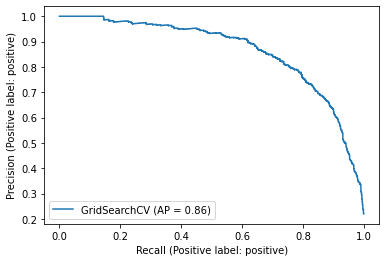

In [198]:
metrics.plot_precision_recall_curve(grid_tf, test_vectorizered, y_test)


In [199]:
# we have a average precesion of 0.86

A precision of 0.86 means that 86% of the positive predictions are correct. It measures the quality of the positive class predictions your model is making.

10318    AmericanAir Also wait 2 hours speak someone phone cant wait 2 hours                                      
881      united three people awesome working long hours easy say sorry Twitter help ppl EWR                       
3237     united thanks rude customer service 3 hour delay really helped timing wise afternoon meetings Hello Delta
7500     USAirways name Rett Cavan gofundme page going take last breath tonight airline cares money               
7420     USAirways hire smarter people systems keep crashing instead mooks man airports goDelta                   
                                                  ...                                                             
4859     SouthwestAir Didnt see travel compete unused funds expiration date hidden fine print Never saw           
919      united trying makechange reservations getting extremely frustrated Giving trying another airline         
500      united completed form doubt use UA doesnt care 6 day vacation 5 Sure UA